In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
accts = pd.read_csv("ZayoHackathonData_Accounts.csv", index_col=0)
cpqs = pd.read_csv("ZayoHackathonData_CPQs.csv", index_col=0)
opps = pd.read_csv("ZayoHackathonData_Opportunities.csv", index_col=0)
#svcs = pd.read_csv("ZayoHackathonData_Services.csv", index_col=0)
#sts = pd.read_csv("ZayoHackathonData_Sites.csv", index_col=0)
bldgs = pd.read_csv("ZayoHackathonData_Buildings.csv")

In [3]:
#opps.columns
np.unique(opps['StageName'])

array(['1 - Working', '2 - Best Case', '3 - Committed', '4 - Closed',
       '5 - Accepted', 'Closed - Lost'], dtype=object)

In [4]:
# Add a new column corresponding to whether or not the opportunity is close to being closed
to_predict = opps[(opps["StageName"] == "1 - Working") | (opps['StageName'] ==" 2 - Best Case")]
opp = opps[(opps["StageName"] == "3 - Committed") | (opps['StageName'] == "4 - Closed") | (opps['StageName'] == "5 - Accepted") | (opps['StageName'] == "Closed - Lost")]

opp['IsCommitted'] = [row['StageName'] in ["3 - Committed", "4 - Closed", "5 - Accepted"] for i, row in opp.iterrows()]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
cpqs.columns

Index([u'Account ID', u'CreatedDate', u'Product Group', u' X36 MRC List ',
       u' X36 NRR List ', u' X36 NPV List ', u'Building ID', u'Market',
       u'Street Address', u'City', u'State', u'Postal Code',
       u'Network Proximity', u'On Zayo Network Status'],
      dtype='object')

In [6]:
to_predict = to_predict.merge(accts, left_on = to_predict.columns[1], right_on = accts.columns[0], how = 'left', suffixes = ['_opp', '_accts'])
opp = opp.merge(accts, left_on = opp.columns[1], right_on = accts.columns[0], how = 'left', suffixes = ['_opp', '_accts'])
print(opp.columns.difference(to_predict.columns))

Index([u'IsCommitted'], dtype='object')


In [7]:
to_predict = to_predict.merge(cpqs, left_on = to_predict.columns[1], right_on = cpqs.columns[0], how = 'left', suffixes = ['_opp', '_cpqs'])
opp = opp.merge(cpqs, left_on = opp.columns[1], right_on = cpqs.columns[0], how = 'left', suffixes = ['_opp', '_cpqs'])
print(opp.columns.difference(to_predict.columns))

Index([u'IsCommitted'], dtype='object')


In [8]:
to_predict = to_predict.merge(bldgs, left_on = to_predict.columns[10], right_on = bldgs.columns[0], how = 'left', suffixes = ['_opp', '_bldgs'])
opp = opp.merge(bldgs, left_on = opp.columns[10], right_on = bldgs.columns[0], how = 'left', suffixes = ['_opp', '_bldgs'])
print(opp.columns.difference(to_predict.columns))

Index([u'IsCommitted'], dtype='object')


In [9]:
#opp['Market'].tail()
opp.columns

Index([u'•ÈÀOpportunity ID', u'Account ID', u'StageName', u'IsClosed',
       u'IsWon', u'CreatedDate_opp', u'Term in Months', u'Service',
       u'Opportunity Type', u'Product Group_opp', u'Building ID_opp',
       u'Market_opp', u'Street Address_opp', u'City_opp', u'State_opp',
       u'Postal Code_opp', u'Network Proximity_opp',
       u'On Zayo Network Status_opp', u'Latitude_opp', u'Longitude_opp',
       u'IsCommitted', u'Industry', u'Vertical', u' Total BRR ',
       u' AnnualRevenue ', u'NumberOfEmployees', u' DandB Revenue ',
       u'DandB Total Employees', u'CreatedDate_cpqs', u'Product Group_cpqs',
       u' X36 MRC List ', u' X36 NRR List ', u' X36 NPV List ',
       u'Building ID_cpqs', u'Market_cpqs', u'Street Address_cpqs',
       u'City_cpqs', u'State_cpqs', u'Postal Code_cpqs',
       u'Network Proximity_cpqs', u'On Zayo Network Status_cpqs',
       u'Building ID', u'Market', u'Street Address', u'City', u'State',
       u'Postal Code', u'Latitude_bldgs', u'Longitude_b

## Data Preprocessing

In [10]:
opp_filtered = opp.drop([opp.columns[0], opp.columns[1], opp.columns[2], opp.columns[3], opp.columns[4], opp.columns[7], 
                         opp.columns[5], opp.columns[10], opp.columns[11], opp.columns[12], opp.columns[18],
                         opp.columns[13], opp.columns[14], opp.columns[15], opp.columns[16], opp.columns[17], 
                         opp.columns[19], opp.columns[28], opp.columns[29], opp.columns[33], opp.columns[34], 
                         opp.columns[35], opp.columns[36], opp.columns[37], opp.columns[38], opp.columns[39], 
                         opp.columns[40], opp.columns[41], opp.columns[43], opp.columns[47], opp.columns[48]], axis=1)
opp_filtered.columns

Index([u'Term in Months', u'Opportunity Type', u'Product Group_opp',
       u'IsCommitted', u'Industry', u'Vertical', u' Total BRR ',
       u' AnnualRevenue ', u'NumberOfEmployees', u' DandB Revenue ',
       u'DandB Total Employees', u' X36 MRC List ', u' X36 NRR List ',
       u' X36 NPV List ', u'Market', u'City', u'State', u'Postal Code',
       u'On Zayo Network Status', u'Net Classification', u'Type',
       u'Network Proximity', u' Estimated Build Cost '],
      dtype='object')

In [11]:
to_predict_filtered = to_predict.drop([opp.columns[0], opp.columns[1], opp.columns[2], opp.columns[3], opp.columns[4], opp.columns[7], 
                         opp.columns[5], opp.columns[10], opp.columns[11], opp.columns[12], opp.columns[18],
                         opp.columns[13], opp.columns[14], opp.columns[15], opp.columns[16], opp.columns[17], 
                         opp.columns[19], opp.columns[28], opp.columns[29], opp.columns[33], opp.columns[34], 
                         opp.columns[35], opp.columns[36], opp.columns[37], opp.columns[38], opp.columns[39], 
                         opp.columns[40], opp.columns[41], opp.columns[43], opp.columns[47], opp.columns[48]], axis=1)
to_predict_filtered.columns

Index([u'Term in Months', u'Opportunity Type', u'Product Group_opp',
       u'Industry', u'Vertical', u' Total BRR ', u' AnnualRevenue ',
       u'NumberOfEmployees', u' DandB Revenue ', u'DandB Total Employees',
       u' X36 MRC List ', u' X36 NRR List ', u' X36 NPV List ', u'Market',
       u'City', u'State', u'Postal Code', u'On Zayo Network Status',
       u'Net Classification', u'Type', u'Network Proximity',
       u' Estimated Build Cost '],
      dtype='object')

In [12]:
print(len(to_predict_filtered.columns), len(opp_filtered.columns))

(22, 23)


In [13]:
features = opp_filtered.columns - [u'IsCommitted']
prediction = [u'IsCommitted']

opp_filtered[features].tail()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  if __name__ == '__main__':


,AnnualRevenue,DandB Revenue,Estimated Build Cost,Total BRR,X36 MRC List,X36 NPV List,X36 NRR List,City,DandB Total Employees,Industry,...,Network Proximity,NumberOfEmployees,On Zayo Network Status,Opportunity Type,Postal Code,Product Group_opp,State,Term in Months,Type,Vertical
723987,NaN,NaN,"$27,768.50",NaN,$576.25,"$13,889.20",$-,Carrollton,NaN,NaN,...,630.74,NaN,On Zayo Network,New Service,75007,Ethernet,TX,36.0,Neutral Data Center,NaN
723988,NaN,NaN,"$27,768.50",NaN,"$2,416.51","$20,340.23","$2,766.00",Carrollton,NaN,NaN,...,630.74,NaN,On Zayo Network,New Service,75007,Ethernet,TX,36.0,Neutral Data Center,NaN
723989,NaN,NaN,"$27,768.50",NaN,"$5,106.28","$44,056.87","$2,766.00",Carrollton,NaN,NaN,...,630.74,NaN,On Zayo Network,New Service,75007,Ethernet,TX,36.0,Neutral Data Center,NaN
723990,NaN,NaN,"$27,768.50",NaN,"$5,106.28","$44,056.87","$2,766.00",Carrollton,NaN,NaN,...,630.74,NaN,On Zayo Network,New Service,75007,Ethernet,TX,36.0,Neutral Data Center,NaN
723991,NaN,NaN,"$219,671.50",NaN,"$1,664.05","$12,181.69",$922.00,Arvada,NaN,NaN,...,6909.05,NaN,Not on Zayo Network,New Service,80004,Ethernet,CO,36.0,Private Data Center,NaN


In [14]:
# First let's convert any dollar amounts to floats
to_predict_filtered[[' AnnualRevenue ']] = to_predict_filtered[[' AnnualRevenue ']].replace('[\$,]','',regex=True).replace('[\-]','0',regex=True).astype(float)
to_predict_filtered[[' DandB Revenue ']] = to_predict_filtered[[' DandB Revenue ']].replace('[\$,]','',regex=True).replace('[\-]','0',regex=True).astype(float)
to_predict_filtered[[' Estimated Build Cost ']] = to_predict_filtered[[' Estimated Build Cost ']].replace('[\$,]','',regex=True).astype(float)
to_predict_filtered[[' Total BRR ']] = to_predict_filtered[[' Total BRR ']].replace('[\$,]','',regex=True).replace('[\-]','0',regex=True).astype(float)
to_predict_filtered[[' X36 MRC List ']] = to_predict_filtered[[' X36 MRC List ']].replace('[\$,]','',regex=True).replace('[\-]','0',regex=True).astype(float)
to_predict_filtered[[' X36 NPV List ']] = to_predict_filtered[[' X36 NPV List ']].replace('[\$,]','',regex=True).replace('[\-]','0',regex=True).astype(float)
to_predict_filtered[[' X36 NRR List ']] = to_predict_filtered[[' X36 NRR List ']].replace('[\$,]','',regex=True).replace('[\-]','0',regex=True).astype(float)
to_predict_filtered[features].tail()

opp_filtered[[' AnnualRevenue ']] = opp_filtered[[' AnnualRevenue ']].replace('[\$,]','',regex=True).replace('[\-]','0',regex=True).astype(float)
opp_filtered[[' DandB Revenue ']] = opp_filtered[[' DandB Revenue ']].replace('[\$,]','',regex=True).replace('[\-]','0',regex=True).astype(float)
opp_filtered[[' Estimated Build Cost ']] = opp_filtered[[' Estimated Build Cost ']].replace('[\$,]','',regex=True).astype(float)
opp_filtered[[' Total BRR ']] = opp_filtered[[' Total BRR ']].replace('[\$,]','',regex=True).replace('[\-]','0',regex=True).astype(float)
opp_filtered[[' X36 MRC List ']] = opp_filtered[[' X36 MRC List ']].replace('[\$,]','',regex=True).replace('[\-]','0',regex=True).astype(float)
opp_filtered[[' X36 NPV List ']] = opp_filtered[[' X36 NPV List ']].replace('[\$,]','',regex=True).replace('[\-]','0',regex=True).astype(float)
opp_filtered[[' X36 NRR List ']] = opp_filtered[[' X36 NRR List ']].replace('[\$,]','',regex=True).replace('[\-]','0',regex=True).astype(float)

opp_filtered[features].tail()

,AnnualRevenue,DandB Revenue,Estimated Build Cost,Total BRR,X36 MRC List,X36 NPV List,X36 NRR List,City,DandB Total Employees,Industry,...,Network Proximity,NumberOfEmployees,On Zayo Network Status,Opportunity Type,Postal Code,Product Group_opp,State,Term in Months,Type,Vertical
723987,NaN,NaN,27768.5,NaN,576.25,13889.20,0.0,Carrollton,NaN,NaN,...,630.74,NaN,On Zayo Network,New Service,75007,Ethernet,TX,36.0,Neutral Data Center,NaN
723988,NaN,NaN,27768.5,NaN,2416.51,20340.23,2766.0,Carrollton,NaN,NaN,...,630.74,NaN,On Zayo Network,New Service,75007,Ethernet,TX,36.0,Neutral Data Center,NaN
723989,NaN,NaN,27768.5,NaN,5106.28,44056.87,2766.0,Carrollton,NaN,NaN,...,630.74,NaN,On Zayo Network,New Service,75007,Ethernet,TX,36.0,Neutral Data Center,NaN
723990,NaN,NaN,27768.5,NaN,5106.28,44056.87,2766.0,Carrollton,NaN,NaN,...,630.74,NaN,On Zayo Network,New Service,75007,Ethernet,TX,36.0,Neutral Data Center,NaN
723991,NaN,NaN,219671.5,NaN,1664.05,12181.69,922.0,Arvada,NaN,NaN,...,6909.05,NaN,Not on Zayo Network,New Service,80004,Ethernet,CO,36.0,Private Data Center,NaN


In [15]:
from sklearn import preprocessing

# Sklearn's decision trees do not like features which are strings. We need 
# to convert any features which are strings into numerical values. We'll use
# Sklearn's built in label encoding. We'll store these encoders for our 
# understanding later.

le = {}

for feature in features:
    #print feature
    if opp_filtered[feature].dtype == np.float64 or opp_filtered[feature].dtype == np.int64:
        opp_filtered[feature] = opp_filtered[feature].replace(np.nan, 0, regex=True)
        to_predict_filtered[feature] = to_predict_filtered[feature].replace(np.nan, 0, regex=True)
        continue
    print feature
    opp_filtered[feature] = opp_filtered[feature].replace(np.nan, u'NaN', regex=True)
    to_predict_filtered[feature] = to_predict_filtered[feature].replace(np.nan, u'NaN', regex=True)
    
    le[feature] = preprocessing.LabelEncoder()
    le[feature].fit(pd.concat([opp_filtered[feature], to_predict_filtered[feature]]))
    #print le[feature].classes_

    opp_filtered[feature] = [le[feature].transform([row])[0] for row in opp_filtered[feature]]
    to_predict_filtered[feature] = [le[feature].transform([row])[0] for row in to_predict_filtered[feature]] 

City
Industry
Market
Net Classification
On Zayo Network Status
Opportunity Type
Postal Code
Product Group_opp
State
Type
Vertical


In [16]:
opp_filtered.to_csv("opp_training_data.csv", sep =",")
opp_filtered.head()

,Term in Months,Opportunity Type,Product Group_opp,IsCommitted,Industry,Vertical,Total BRR,AnnualRevenue,NumberOfEmployees,DandB Revenue,...,X36 NPV List,Market,City,State,Postal Code,On Zayo Network Status,Net Classification,Type,Network Proximity,Estimated Build Cost
0,12.0,5,3,False,0,0,0.0,0.0,0.0,0.0,...,11560.17,0,8,1,56,2,1,1,66.45,11993.5
1,12.0,5,3,False,0,0,0.0,0.0,0.0,0.0,...,11560.17,0,8,1,56,2,1,1,66.45,11993.5
2,12.0,5,3,False,0,0,0.0,0.0,0.0,0.0,...,12843.38,0,8,1,56,2,1,1,66.45,11993.5
3,12.0,5,3,False,0,0,0.0,0.0,0.0,0.0,...,16611.38,0,8,1,56,2,1,1,66.45,11993.5
4,12.0,5,3,False,0,0,0.0,0.0,0.0,0.0,...,16611.38,0,8,1,56,2,1,1,66.45,11993.5


In [17]:
to_predict_filtered.to_csv("opp_test_data.csv", sep =",")
to_predict_filtered.head()

,Term in Months,Opportunity Type,Product Group_opp,Industry,Vertical,Total BRR,AnnualRevenue,NumberOfEmployees,DandB Revenue,DandB Total Employees,...,X36 NPV List,Market,City,State,Postal Code,On Zayo Network Status,Net Classification,Type,Network Proximity,Estimated Build Cost
0,0.0,5,3,0,0,0.0,0.0,0.0,0.0,0.0,...,14966.86,0,8,1,61,2,1,19,185.76,15572.8
1,0.0,5,3,0,0,0.0,0.0,0.0,0.0,0.0,...,14932.09,0,8,1,61,2,1,19,185.76,15572.8
2,0.0,5,3,0,0,0.0,0.0,0.0,0.0,0.0,...,17897.85,0,8,1,61,2,1,19,185.76,15572.8
3,0.0,5,3,0,0,0.0,0.0,0.0,0.0,0.0,...,10111.19,0,8,1,61,2,1,19,185.76,15572.8
4,0.0,5,3,0,0,0.0,0.0,0.0,0.0,0.0,...,113678.99,0,8,1,61,2,1,19,185.76,15572.8


In [18]:
import pickle

print(le.keys())

with open('label_encoding.p', 'wb') as handle:
    pickle.dump(le, handle)

['City', 'Vertical', 'Industry', 'Opportunity Type', 'On Zayo Network Status', 'State', 'Net Classification', 'Postal Code', 'Type', 'Market', 'Product Group_opp']


## Build a Random Forest

In [19]:
# Decision trees can be prone to overfitting. Let's use a
# random forest (a bunch of decision trees trained on 
# sub-samples of the data).

from sklearn import ensemble

clf = ensemble.RandomForestClassifier()
fraction = 4.0/5.0
shuffled = opp_filtered.sample(frac=1)

trainX = shuffled[features][:int(round(fraction*len(shuffled)))].values
trainY = shuffled[prediction][:int(round(fraction*len(shuffled)))].values

clf = clf.fit(trainX, trainY)

testX = shuffled[features][int(round(fraction*len(shuffled))):].values
testY = shuffled[prediction][int(round(fraction*len(shuffled))):].values

print(clf.score(testX, testY))

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.982769099021


Feature ranking:
1.	feature 19	(0.236202, Term in Months)
2.	feature 14	(0.167972, On Zayo Network Status)
3.	feature 3	(0.106356, Total BRR)
4.	feature 17	(0.098174, Product Group_opp)
5.	feature 12	(0.066883, Network Proximity)
6.	feature 16	(0.065358, Postal Code)
7.	feature 2	(0.055471, Estimated Build Cost)
8.	feature 20	(0.050330, Type)
9.	feature 7	(0.047667, City)
10.	feature 4	(0.025769, X36 MRC List)
11.	feature 5	(0.023935, X36 NPV List)
12.	feature 6	(0.018622, X36 NRR List)
13.	feature 11	(0.015084, Net Classification)
14.	feature 10	(0.009289, Market)
15.	feature 15	(0.006316, Opportunity Type)
16.	feature 18	(0.005845, State)
17.	feature 13	(0.000512, NumberOfEmployees)
18.	feature 21	(0.000215, Vertical)
19.	feature 8	(0.000000, DandB Total Employees)
20.	feature 9	(0.000000, Industry)
21.	feature 1	(0.000000, DandB Revenue)
22.	feature 0	(0.000000, AnnualRevenue)


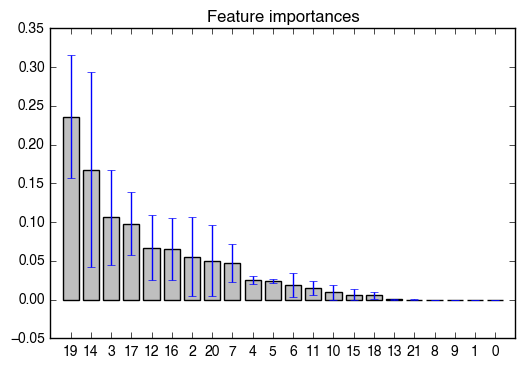

In [20]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(opp_filtered[features].shape[1]):
    print("%d.\tfeature %d\t(%f, %s)" % (f + 1, indices[f], importances[indices[f]], opp_filtered[features].columns[indices[f]].strip()))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(opp_filtered[features].shape[1]), importances[indices],
    color = '0.75', yerr=std[indices], align="center")
plt.xticks(range(opp_filtered[features].shape[1]), indices)
plt.xlim([-1, opp_filtered[features].shape[1]])
plt.show()

## Predict on working account

In [22]:
to_predict_filtered.columns

Index([u'Term in Months', u'Opportunity Type', u'Product Group_opp',
       u'Industry', u'Vertical', u' Total BRR ', u' AnnualRevenue ',
       u'NumberOfEmployees', u' DandB Revenue ', u'DandB Total Employees',
       u' X36 MRC List ', u' X36 NRR List ', u' X36 NPV List ', u'Market',
       u'City', u'State', u'Postal Code', u'On Zayo Network Status',
       u'Net Classification', u'Type', u'Network Proximity',
       u' Estimated Build Cost '],
      dtype='object')

In [23]:
test_predictions = clf.predict_proba(to_predict_filtered[features].values)

In [24]:
clf.classes_

array([False,  True], dtype=bool)

In [25]:
len(test_predictions)

877203

In [26]:
to_predict['IsCommittedProbability'] = [pred[1] for pred in test_predictions]
to_predict.head()

,•ÈÀOpportunity ID,Account ID,StageName,IsClosed,IsWon,CreatedDate_opp,Term in Months,Service,Opportunity Type,Product Group_opp,...,State,Postal Code,Latitude_bldgs,Longitude_bldgs,On Zayo Network Status,Net Classification,Type,Network Proximity,Estimated Build Cost,IsCommittedProbability
0,Opp-000004,Acct-000143,1 - Working,False,False,7/1/16,NaN,NaN,New Service,Ethernet,...,GA,30309,33.783427,-84.388557,On Zayo Network,On-Net,Neutral Data Center,185.76,"$15,572.80",0.2
1,Opp-000004,Acct-000143,1 - Working,False,False,7/1/16,NaN,NaN,New Service,Ethernet,...,GA,30309,33.783427,-84.388557,On Zayo Network,On-Net,Neutral Data Center,185.76,"$15,572.80",0.2
2,Opp-000004,Acct-000143,1 - Working,False,False,7/1/16,NaN,NaN,New Service,Ethernet,...,GA,30309,33.783427,-84.388557,On Zayo Network,On-Net,Neutral Data Center,185.76,"$15,572.80",0.2
3,Opp-000004,Acct-000143,1 - Working,False,False,7/1/16,NaN,NaN,New Service,Ethernet,...,GA,30309,33.783427,-84.388557,On Zayo Network,On-Net,Neutral Data Center,185.76,"$15,572.80",0.1
4,Opp-000004,Acct-000143,1 - Working,False,False,7/1/16,NaN,NaN,New Service,Ethernet,...,GA,30309,33.783427,-84.388557,On Zayo Network,On-Net,Neutral Data Center,185.76,"$15,572.80",0.1


In [27]:
print(len(to_predict), len(to_predict_filtered))

(877203, 877203)


In [28]:
to_predict.to_csv("opp_working_data.csv", sep =",")

In [29]:
to_predict_further_filtered = to_predict
to_predict_further_filtered.columns[2:(len(to_predict_further_filtered.columns)-1)]

Index([u'StageName', u'IsClosed', u'IsWon', u'CreatedDate_opp',
       u'Term in Months', u'Service', u'Opportunity Type',
       u'Product Group_opp', u'Building ID_opp', u'Market_opp',
       u'Street Address_opp', u'City_opp', u'State_opp', u'Postal Code_opp',
       u'Network Proximity_opp', u'On Zayo Network Status_opp',
       u'Latitude_opp', u'Longitude_opp', u'Industry', u'Vertical',
       u' Total BRR ', u' AnnualRevenue ', u'NumberOfEmployees',
       u' DandB Revenue ', u'DandB Total Employees', u'CreatedDate_cpqs',
       u'Product Group_cpqs', u' X36 MRC List ', u' X36 NRR List ',
       u' X36 NPV List ', u'Building ID_cpqs', u'Market_cpqs',
       u'Street Address_cpqs', u'City_cpqs', u'State_cpqs',
       u'Postal Code_cpqs', u'Network Proximity_cpqs',
       u'On Zayo Network Status_cpqs', u'Building ID', u'Market',
       u'Street Address', u'City', u'State', u'Postal Code', u'Latitude_bldgs',
       u'Longitude_bldgs', u'On Zayo Network Status', u'Net Classificatio

In [30]:
to_predict_further_filtered = to_predict_further_filtered.drop(to_predict_further_filtered.columns[2:(len(to_predict_further_filtered.columns)-1)], axis=1)
print(to_predict_further_filtered.columns)
to_predict_further_filtered.to_csv("random_forest/opp_working_data_filtered.csv", sep =",")

Index([u'•ÈÀOpportunity ID', u'Account ID', u'IsCommittedProbability'], dtype='object')


In [47]:
from sklearn import tree

from IPython.display import Image  
import pydotplus

dot_data = tree.export_graphviz(clf.estimators_[0], out_file='tree.dot', impurity=False,
                         filled=True, rounded=True, max_depth=3, #class_names=['Is Not Committed', 'Is Committed'],  
                         special_characters=True, feature_names=features)  
#graph = pydotplus.graph_from_dot_data(dot_data)  
#Image(graph.create_png())
